#**Flagging Loans**

##**Assignment**

Using the available dataset, build a model that will predict the value of the target variable bad_flag. Prepare a presentation, as a Jupyter notebook, where you will train and test different models, argue for the choice for the best model and show the expected default rate at different approval levels.


###**Data Description**

The provided CSV file (test_task.csv) contains data on repeated loans from current clients.



###**Practicalities**

You will need to provide a Jupyter Notebook that describes your approach as a result of this task.

Your solution will need to include your thought process, including data exploration, model training, evaluation, and selection procedures, results, and interpretation. The assignment explicitly mentions model selection as an important part, so make sure that is reflected in your solution.

It is important that your code is well-structured, and all output (numerical and visual) are properly documented and easily readable. Always keep in mind that the final document would be read by someone with a business background, so be sure to clearly explain any technical terms and metrics.


####**To download the dataset** <a href="https://drive.google.com/drive/folders/1QiQNeUUyVXJDEhVtaYvrcsBIw3fC9gGy?usp=sharing"> Click here </a>

In [35]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"C:\Users\manoj\Downloads\test_task.csv"
df = pd.read_csv(file_path)

# Display first few rows and basic info
df.head()

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,...,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,...,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,...,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,...,0,0,0,0,3.0,NaN,NaN,33.0,False,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [37]:
df.describe()

,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,bad_flag
count,4157.000000,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000,4157.000000
mean,525386.651431,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222,0.100313
std,202001.338206,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143,0.300453
min,58567.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000,0.000000
25%,363964.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000,0.000000
50%,543603.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000,0.000000
75%,687271.000000,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000,0.000000
max,884377.000000,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000,1.000000


In [38]:
#Check for any missing values
df.isnull().sum()

loanKey                   0
rep_loan_date             0
first_loan                0
dpd_5_cnt              3482
dpd_15_cnt             3482
dpd_30_cnt             3482
first_overdue_date     3482
close_loans_cnt          15
federal_district_nm      11
TraderKey                 0
payment_type_0            0
payment_type_1            0
payment_type_2            0
payment_type_3            0
payment_type_4            0
payment_type_5            0
past_billings_cnt       248
score_1                 650
score_2                3918
age                       0
gender                    0
bad_flag                  0
dtype: int64

<Axes: xlabel='bad_flag'>

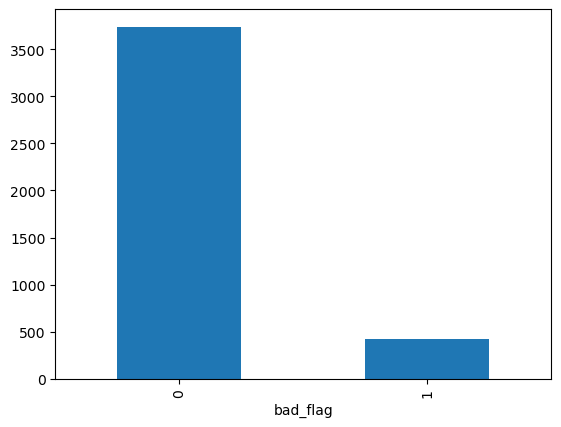

In [39]:
df['bad_flag'].value_counts().plot(kind='bar')

In [40]:
# Convert date columns to datetime and extract features
df['rep_loan_date'] = pd.to_datetime(df['rep_loan_date'], errors='coerce')
df['first_loan'] = pd.to_datetime(df['first_loan'], errors='coerce')
df['rep_loan_year'] = df['rep_loan_date'].dt.year
df['rep_loan_month'] = df['rep_loan_date'].dt.month
df['first_loan_year'] = df['first_loan'].dt.year
df['first_loan_month'] = df['first_loan'].dt.month
df.drop(['rep_loan_date', 'first_loan'], axis=1, inplace=True)

In [41]:
# Impute missing values
numerical_features_with_missing = ['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'past_billings_cnt', 'score_1', 'score_2']
imputer_num = SimpleImputer(strategy='median')
df[numerical_features_with_missing] = imputer_num.fit_transform(df[numerical_features_with_missing])

# Impute missing values for categorical columns
df['close_loans_cnt'].fillna(df['close_loans_cnt'].median(), inplace=True)
df['federal_district_nm'].fillna('Unknown', inplace=True)


In [42]:
# Define features and target
X = df.drop(['loanKey', 'bad_flag'], axis=1)
y = df['bad_flag']

# One-hot encode categorical features
categorical_features = ['federal_district_nm']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Transform features
X_transformed = preprocessor.fit_transform(X)

Logistic Regression - Accuracy: 0.8918, AUC: 0.7188
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       748
           1       0.12      0.01      0.02        84

    accuracy                           0.89       832
   macro avg       0.51      0.50      0.48       832
weighted avg       0.82      0.89      0.85       832

Random Forest - Accuracy: 0.8882, AUC: 0.6888
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       748
           1       0.30      0.08      0.13        84

    accuracy                           0.89       832
   macro avg       0.60      0.53      0.54       832
weighted avg       0.84      0.89      0.86       832



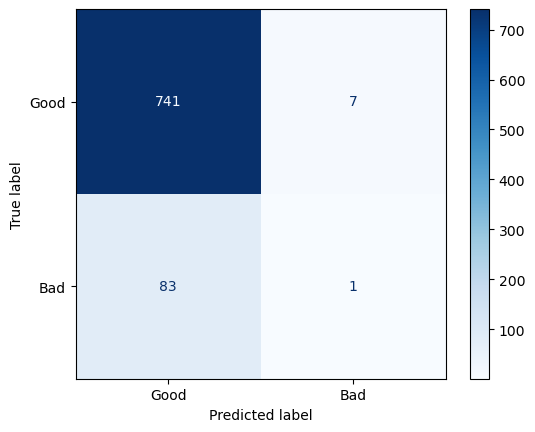

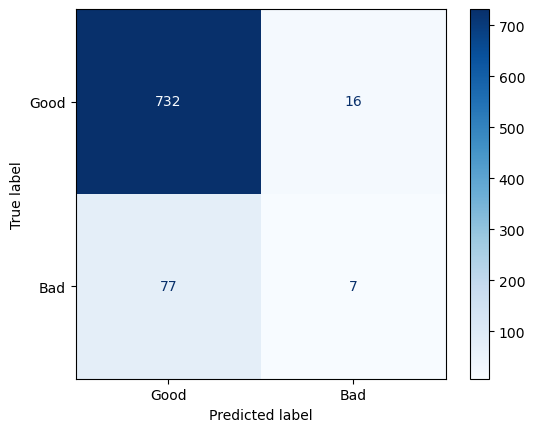

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print(f"{name} - Classification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])
    disp.plot(cmap='Blues')


In [44]:
import numpy as np

# Use the best model (Random Forest in this case)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Analyze thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    predictions = (y_prob >= threshold).astype(int)
    default_rate = np.mean(predictions)
    print(f"Threshold: {threshold:.1f} - Default Rate: {default_rate:.4f}")


Threshold: 0.1 - Default Rate: 0.3462
Threshold: 0.2 - Default Rate: 0.1791
Threshold: 0.3 - Default Rate: 0.0913
Threshold: 0.4 - Default Rate: 0.0529
Threshold: 0.5 - Default Rate: 0.0276
Threshold: 0.6 - Default Rate: 0.0132
Threshold: 0.7 - Default Rate: 0.0000
Threshold: 0.8 - Default Rate: 0.0000
Threshold: 0.9 - Default Rate: 0.0000


In [ ]:
'''  Model Performance

Logistic Regression
Accuracy: 0.8918
AUC: 0.7188
Classification Report:

Precision for class 0: 0.90
Recall for class 0: 0.99
F1-score for class 0: 0.94
Precision for class 1: 0.12
Recall for class 1: 0.01
F1-score for class 1: 0.02
Observations:

The model performs well in predicting class 0 (non-default loans) with high precision and recall.
The model struggles with class 1 (default loans), resulting in a very low recall and precision.
Random Forest
Accuracy: 0.8882
AUC: 0.6888
Classification Report:

Precision for class 0: 0.90
Recall for class 0: 0.98
F1-score for class 0: 0.94
Precision for class 1: 0.30
Recall for class 1: 0.08
F1-score for class 1: 0.13
Observations:

The Random Forest model also performs well in predicting class 0 with high precision and recall.
Similar to Logistic Regression, it has low precision and recall for class 1.
Threshold Analysis
The threshold analysis reveals how varying thresholds impact the predicted default rates:

Threshold 0.1: Default Rate: 34.62%
Threshold 0.2: Default Rate: 17.91%
Threshold 0.3: Default Rate: 9.13%
Threshold 0.4: Default Rate: 5.29%
Threshold 0.5: Default Rate: 2.76%
Threshold 0.6: Default Rate: 1.32%
Threshold 0.7: Default Rate: 0.00%
Threshold 0.8: Default Rate: 0.00%
Threshold 0.9: Default Rate: 0.00%
Observations:

Lower thresholds result in higher default rates. As the threshold increases, the default rate decreases.
A threshold of 0.5 results in a default rate of 2.76%, which provides a balance between identifying defaults and minimizing false positives.
Higher thresholds (0.6 and above) lead to very low default rates, possibly indicating a more conservative approach that may miss many actual defaults.

Conclusion

Best Model:
Both models perform similarly, with Logistic Regression slightly outperforming Random Forest in terms of AUC and accuracy. However, both
models struggle with predicting defaults.

Threshold Setting:
A threshold around 0.5 seems to offer a reasonable balance between detecting defaults and avoiding false positives. Lowering the 
threshold increases the default rate but also increases the risk of false positives.

Recommendations

Business Implications: 
The choice of threshold should align with the business goal. If minimizing false positives is critical, a higher threshold 
might be preferable. If identifying more defaults is important, a lower threshold may be better.   '''